# Spectral Methods for Hyperbolic Equations

## Review from Last Week: Wave Equation

Recall from last week the 1D wave equation:
$$ \frac{\partial^2\phi}{\partial t^2}=v^2\frac{\partial^2\phi}{\partial r^2} $$
  
We considered a piano string of length $L$, initially at rest. At time $t=0$ the string is struck by the piano hammer a distance $d$ from the end of from the string. The string vibrates as a result of being struck, ercept at the ends, $x=0$, and $x=L$, where it is held fixed.

We considered the case $v=100\mathrm{ms^{-1}}$, with the initial condition that $\phi(x)=0$ everywhere but the velocity $\psi(x)$ is nonzero, with profile
\begin{equation}
  \psi(x) = C\frac{x(L-x)}{L^2}\exp\left[-\frac{(x-d)^2}{2\sigma^2}\right],
\end{equation}
where $L=1$m, $d=10$cm, $C=1\mathrm{ms^{-1}}$, and $\sigma=0.3$m. 

## New This Week

Now, we can expand the  initial conditions in terms of a Fourier sine series:
$$ \phi_0(x)=\sum_{k=1}^{\infty}\tilde\phi_{0,k}\sin\left(\frac{k\pi x}L\right)$$
$$ \psi_0(x)=\sum_{k=1}^{\infty}\tilde{\psi}_{0,k}\sin\left(\frac{k\pi x}L\right)$$
Note  that all the terms in this series vanish at $x=0$ and $x=L$, automatically satisfying the boundary conditions for $\phi$, and similarly for $\psi$.

We can show, the general solution in terms of the Fourier series is:
$$ \phi(x,t)=\sum_{k=1}^{\infty}\sin\left(\frac{k\pi x}L\right)\left[\tilde\phi_{0,k}\cos(\omega_kt)+\frac{\tilde{\psi}_{0,k}}{\omega_k}\sin(\omega_kt)\right] $$
 * By substitution:
$$  v^2\frac{\partial^2\phi(x,t)}{\partial x^2}=-\sum_{k=1}^{\infty}(vk\pi/L)^2\sin(k\pi x/L)\left[\tilde\phi_{0,k}\cos(\omega_kt)+\frac{\tilde{\psi}_{0,k}}{\omega_k}\sin(\omega_kt)\right]
$$ 
and
$$ \frac{\partial ^2\phi(x,t)}{\partial t^2}=-\sum_{k=1}^{\infty}(\omega_k)^2\sin(k\pi x/L)\left[\tilde\phi_{0,k}\cos(\omega_kt)+\frac{\tilde{\psi}_{0,k}}{\omega_k}\sin(\omega_kt)\right]$$
 * This requires, to satisfy the wave equation, that for each $k$:
    $$\omega_k^2 = (vk\pi/L)^2.$$ 
 * At $t=0$:
$$ \phi_0(x)=\sum_{k=1}^{\infty}\sin(k\pi x/L)\tilde\phi_{0,k},\ \psi_0(x)=\sum_{k=1}^{\infty}\sin(k\pi x/L)\tilde{\psi}_{0,k}
$$
    as required, thus the solution satisfies the initial conditions. Furthermore the solution automatically satisfies the boundary conditions since $sin(k\pi x/L)$ vanishes at the $x=0$ and $x=L$ for all integer $k$.

## Exercise 1

Use a series solution like this, but truncated at a finite $N$, to repeat Exercise 6 from last week. In case you forgot: 
**Solve from times 0 to 0.1s, and make a plot of $\phi$ vs $x$ over the entire length of string at each of the following times:**
* 0.006 s
* 0.004 s
* 0.002 s
* 0.012 s
* 0.100 s

You can afford to use a large $N$, since you should only have to do one Fourier transform. You may use packaged Fourier functions such as numpy.fft.rfft, numpy.fft.irfft . You can even use functions from the textbook's dcst.py file.

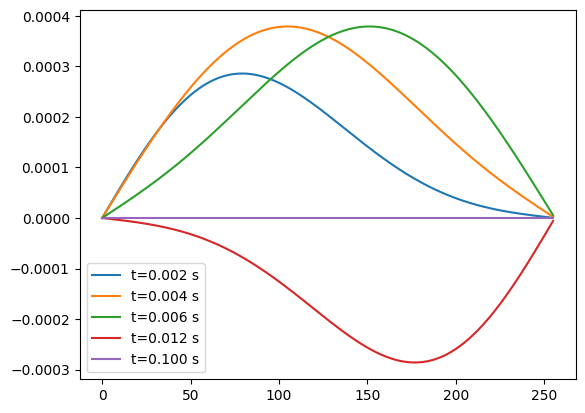

In [49]:
import numpy as np
import matplotlib.pyplot as plt


def dst(y):
    N = len(y)
    y2 = np.empty(2 * N, float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    y2[:N:-1] = -y[1:]
    a = -np.imag(np.fft.rfft(y2))[:N]
    a[0] = 0.0

    return a


def idst(a):
    N = len(a)
    c = np.empty(N + 1, complex)
    c[0] = c[N] = 0.0
    c[1:N] = -1j * a[1:]
    y = np.fft.irfft(c)[:N]
    y[0] = 0.0

    return y


def psiFunc(x, C, L, d, sigma):
    temp = np.exp(-((x - d) ** 2) / (2 * sigma**2))
    return C * x * (L - x) * temp / L**2


# Constants
L = 1  # Length of piano string in meters
v = 100  # Wave speed m/s
C = 1  # m/s
sigma = 0.3  # m
d = 0.1  # m

a = 5e-3  # 5mm grid spacing, in m
N = 2**8
x = np.linspace(0, L, N)  # x array with 100 points

t1 = 0.002
t2 = 0.004
t3 = 0.006
t4 = 0.012
t5 = 0.100


psi0 = psiFunc(x, C, L, d, sigma)


# psi0_k = psi0 / np.sin(k_array * np.pi * x / L)
psi0_k = dst(psi0)
phi_k = 0 * psi0_k

k_array = np.arange(len(psi0_k))
omega_k = v * np.pi * k_array / L

phi_k[1:] = psi0_k[1:] / omega_k[1:]
# what does mean component 0 mean

for t in [t1, t2, t3, t4, t5]:

    phi = idst(phi_k * np.sin(omega_k * t))

    plt.plot(phi, label=f"t={t:.3f} s")

plt.legend()

# Boundary Value Problem Example: Shooting Method for Projectile Motion

Suppose we want to choose an initial velocity $v_0$ for a projectile, thrown straight upward, to land after a certain elapsed time $t_L = 10$ s, where the projectile obeys Newton's 2nd Law:
$$\frac {d^2 y}{dt^2} = \frac{F(y)}m \quad \Rightarrow \quad \frac{dy}{dt} = v\quad \text{and}\quad \frac{dv}{dt} = \frac{F(y)}{m}.$$
Take the gravitational constant to be $g = 9.81 m/s^2$

## Exercise 2

Write code to integrate the equations, using RK4, from time $t=0$ to $t=t_L$ to find $y$ of the projectile at $t=t_L$. It should be a function of $v_0$. Assume the projectile starts at $y=0$ at $t=0$.

Hint: keep track of both $y$ and $v$. At each timestep of the RK4 algorithm, you need to invoke a function that encodes the change in $y$ and the change in $v$. The number of timesteps should be a parameter that you can set.

In [65]:
g = 9.81
t0 = 0
tL = 10
N = 1000  # RK4 steps
h = (tL - t0) / N  # timestep


def f(r, t):
    "for y return v, for v return -g"
    return np.array([r[1], -g], float)


y = 0
v = 10  # initial speed

tpoints = np.linspace(t0, tL, N)


def height(v0):
    "Get the final height for a given initial velocity"

    r = np.array([0, v0], float)
    for t in tpoints:
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        r = r + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    # print("y=", r[0])
    return r[0]

## Exercise 3

Write code that performs a binary search to find the initial value of velocity, $v_0$, that gives us $y=0$ (with target accuracy 1e-8) at $t = t_L$. Invoke the code from the previous exercise (try 1000 RK4 steps) at each step of the search.

In [73]:
target = 1e-8
v1 = 0.01
v2 = 1000

h1 = height(v1)
h2 = height(v2)

while abs(h1 - h2) > target:
    "binary search: find the midpoint, and choose a side"
    vmid = (v1 + v2) / 2
    hmid = height(vmid)

    if hmid < 0:
        v1 = vmid
        h1 = hmid
    else:
        v2 = vmid
        h2 = hmid

v = (v1 + v2) / 2
print("The initial velocity is", v, "m/s")

The initial velocity is 49.05000000042803 m/s


# Verlet Method Example: Orbit Calculation

The position $r(x,y)$ of Earth in its orbital plane can be approximately described by: $$\frac{d^2 \mathbf r}{d t^2} = \frac{-G M \mathbf r}{r^3} $$
where $M = 1.9891 \times 10^{30}$ (mass of Sun in kg). You can import $G$ from scipy.constants

In [77]:
from scipy.constants import G

M = 1.98e30  # kg

Note, when Earth is at its closest point to the Sun (perihilion):
* its direction of motion is perpendicular to the line between itself and the Sun
* $r = 1.471 \times 10^{11}$ m
* linear velocity $v = 3.0287 \times 10^4$ m/s

In [79]:
r0 = 1.471e11  # m
v0 = 3.0287e4  # m/s

## Exercise 4

Write a program to calculate Earth's position using Verlet method, with timestep $h$ = 1 hour, over 5 years. 

You probably want to keep track of $x$ and $y$ separately (similarly $v_x$ and $v_y$), and calculate $r = \sqrt{x^2+y^2}$. 

Define the x, y axes as: Earth starts at perihelion, along x>0, with positive velocity along y axis

In [102]:
# Verlet integration
h = 60 * 60  # 1 hour in seconds
total_time = 5 * 365.25 * 24 * 60 * 60  # 5 years in seconds
tpoints = np.arange(0, total_time, h)

x = r0
y = 0
vx = 0
vy = v0

# Verlet integration
h = 60 * 60  # 1 hour in seconds
total_time = 5 * 365.25 * 24 * 60 * 60  # 5 years in seconds

tpoints = np.arange(0, total_time, h)

x_array = [x]
y_array = [y]
vx_array = [vx]
vy_array = [vy]

for i in range(len(tpoints)):

    # vxhalf = vx_array[i] - 0.5 * h * G * M * x_array[i] / (
    #     x_array[i] ** 2 + y_array[i] ** 2
    # )
    # vyhalf = vy_array[i] - 0.5 * h * G * M * y_array[i] / (
    #     x_array[i] ** 2 + y_array[i] ** 2
    # )

    # x_array.append(x_array[i] + vxhalf * h)
    # y_array.append(y_array[i] + vyhalf * h)
    # r = np.sqrt(x_array[i + 1] ** 2 + y_array[i + 1] ** 2)
    # vx_array.append(vxhalf - 0.5 * h * G * M * x_array[i + 1] / r**3)
    # vy_array.append(vyhalf - 0.5 * h * G * M * y_array[i + 1] / r**3)

    x_array.append(x_array[i] + vx_array[i] * h)
    y_array.append(y_array[i] + vy_array[i] * h)
    r = np.sqrt(x_array[i + 1] ** 2 + y_array[i + 1] ** 2)
    vx_array.append(vx_array[i] - h * G * M * x_array[i + 1] / r**3)
    vy_array.append(vy_array[i] - h * G * M * y_array[i + 1] / r**3)

## Exercise 5

Plot $y$ vs $x$ over the 5 years. This should draw over an orbit 5 times; the orbit should be slightly, but visibly, non-circular. Make the plot in units of AU = Astronomical Unit = average Earth-Sun distance.

Text(0, 0.5, 'y (AU)')

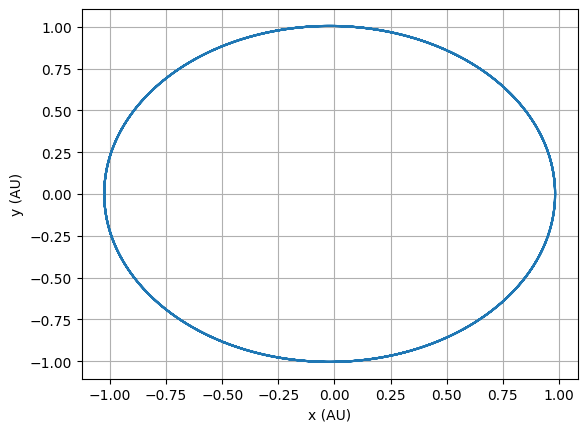

In [103]:
from scipy.constants import au

x_array = np.array(x_array)
y_array = np.array(y_array)

plt.plot(x_array / au, y_array / au)
plt.grid()
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")